## Explore results from runs that have Kv maps inspired in measurements

Compare Tr upwelled, HCW, N^2 and Tr concetration profiles.

In [114]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.gridspec as gspec
import numpy as np
import seaborn as sns
import scipy.stats
import pandas as pd

import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [42]:
grid_file1 = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid_file2 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/gridGlob.nc'
state_file2 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/stateGlob.nc'

with Dataset(grid_file1, 'r') as nbl:
    Z1 = nbl.variables['RC'][:]
with Dataset(grid_file2, 'r') as nbl:
    Z2 = nbl.variables['RC'][:]
with Dataset(state_file2,'r') as stfl:
    time = stfl.variables['T'][:]

In [58]:
class run:
        pass
    
CNTDIFF_run38 = run()
VISC3D_run06 = run()
VISC3D_run05 = run()
VISC3D_run04 = run()
VISC3D_run03 = run()
VISC3D_REALISTIC_run01 = run()
VISC3D_REALISTIC_run02 = run()
VISC3D_REALISTIC_run03 = run()
VISC3D_REALISTIC_run04 = run()
VISC3D_REALISTIC_run05 = run()
VISC3D_REALISTIC_run06 = run()

records = [ CNTDIFF_run38 ,
            VISC3D_run06 ,
            VISC3D_run05 ,
            VISC3D_run03 ,
            VISC3D_run04 ,
            VISC3D_REALISTIC_run01 ,
            VISC3D_REALISTIC_run03 ,
            VISC3D_REALISTIC_run04 ,
            VISC3D_REALISTIC_run02 ,
            VISC3D_REALISTIC_run05 ,
            VISC3D_REALISTIC_run06 ,
           ]
names = ['CNTDIFF_run38', '3DVISC_run06','3DVISC_run05',  '3DVISC_run03','3DVISC_run04', 
         '3DVISC_REALISTIC_run01','3DVISC_REALISTIC_run03','3DVISC_REALISTIC_run02',
         '3DVISC_REALISTIC_run04','3DVISC_REALISTIC_run05','3DVISC_REALISTIC_run06']
exps = ['CNTDIFF', '3DVISC', '3DVISC', '3DVISC','3DVISC','3DVISC_REALISTIC', '3DVISC_REALISTIC', 
        '3DVISC_REALISTIC','3DVISC_REALISTIC', '3DVISC_REALISTIC', '3DVISC_REALISTIC']
runs= ['run38', 'run06', 'run05', 'run03','run04', 'run01', 'run03','run02', 'run04', 'run05', 'run06']
labels = [r'base',r'$K_{can}=10^{-2}$ $m^2$s$^{-1}$',r'$K_{can}=5\times10^{-2}$ $m^2$s$^{-1}$',
          '$K_{can}=10^{-3}$ $m^2$s$^{-1}$','$K_{can}=10^{-4}$ $m^2$s$^{-1}$', '$K_{Mty}$', '$K_{Mty} rim$',
          '$K_{Eel}$', '$K_{Eel}$ rim','$K_{Asc}$', '$K_{Asc}$ rim']
colors = ['black', 'kelley green','leaf green', 'olive', 'cerulean','sky blue','purple','orchid','cherry', 'salmon']
Zs = [Z1, Z1, Z1,Z1, Z2, Z2, Z2,Z2, Z2, Z2]


for rec, name, exp, runnum, col, lab, Z in zip(records,names,exps,runs,colors,labels, Zs):
    rec.name = name
    rec.exp = exp
    rec.run = runnum
    rec.color = col
    rec.label = lab
    rec.Z = Z

### HCW and Tracer upwelled

In [59]:
for ii in range(len(records)):

    file = ('/data/kramosmu/results/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ii].exp,
                                                                                records[ii].exp,
                                                                                records[ii].run))
    print(file)
    dfcan = pd.read_csv(file)
    records[ii].HCW = dfcan['HCW']
    records[ii].TrMass = dfcan['TrMassHCW']
    records[ii].TrMassTot = dfcan['TotTrMass'] 

/data/kramosmu/results/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun38.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun06.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun05.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun03.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun01.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun03.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun02.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun04.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun05.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun06.csv


Text(0.5,1,'Total tracer mass on shelf')

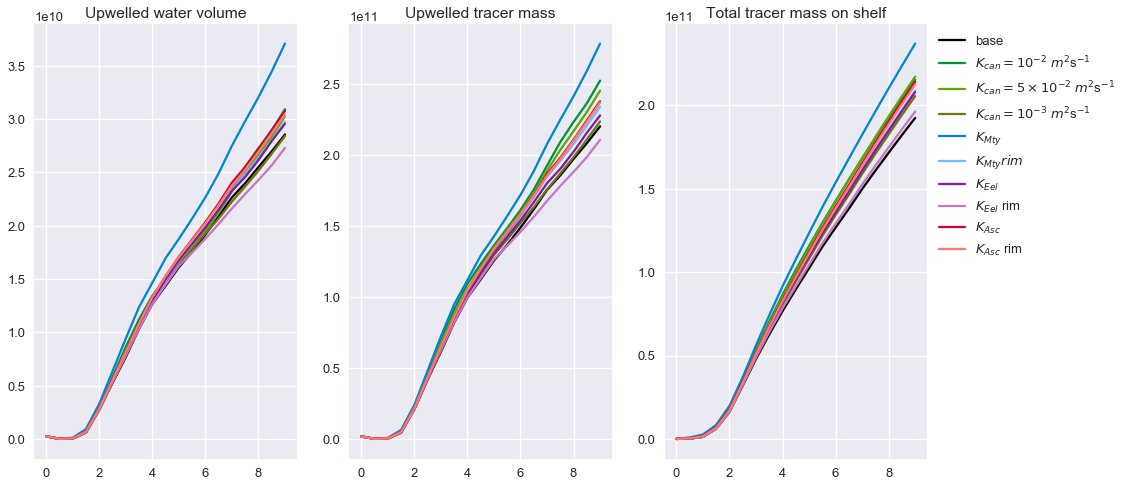

In [103]:
# Canyon cases
sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(16,8))

for rec in records:
    ax[0].plot(np.arange(19)/2,rec.HCW, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.arange(19)/2,rec.TrMass, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[2].plot(np.arange(19)/2,rec.TrMassTot-rec.TrMassTot[0], color=sns.xkcd_rgb[rec.color], label=rec.label)
    
    rec.Phi = np.mean(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.Phi_std = np.std(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
    rec.PhiTr = np.mean(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.PhiTr_std = np.std(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
ax[2].legend(bbox_to_anchor=(1,1))
ax[0].set_title('Upwelled water volume')
ax[1].set_title('Upwelled tracer mass')
ax[2].set_title('Total tracer mass on shelf')

Text(0,0.5,'Tracer Mass / $10^{11}$ $\\mu$Mm$^3$')

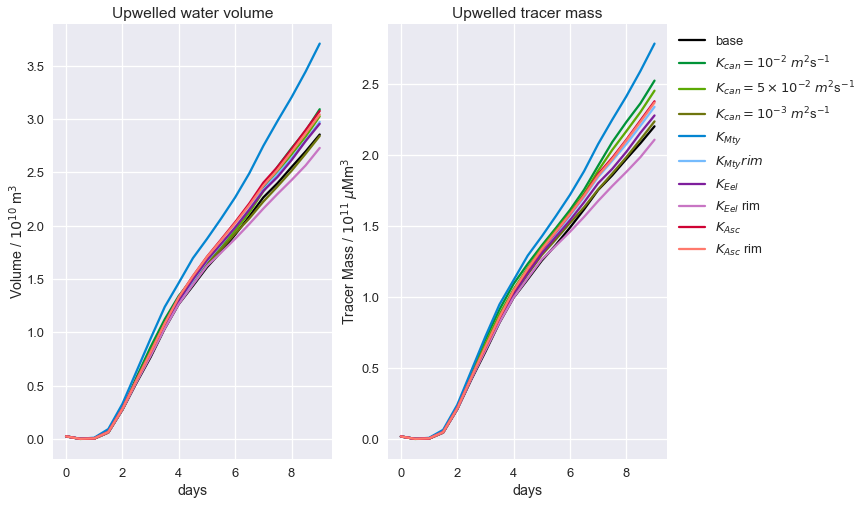

In [61]:
# Canyon cases
sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(11,8))

for rec in records:
    ax[0].plot(np.arange(19)/2,rec.HCW/1E10, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.arange(19)/2,rec.TrMass/1E11, color=sns.xkcd_rgb[rec.color], label=rec.label)
    
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].set_title('Upwelled water volume')
ax[1].set_title('Upwelled tracer mass')
ax[0].set_xlabel('days')
ax[1].set_xlabel('days')
ax[0].set_ylabel(r'Volume / $10^{10}$ m$^3$', labelpad=0.5)
ax[1].set_ylabel(r'Tracer Mass / $10^{11}$ $\mu$Mm$^3$', labelpad=0.5)

#plt.savefig('canyon_upwelling_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

### Stratification and tracer gradient

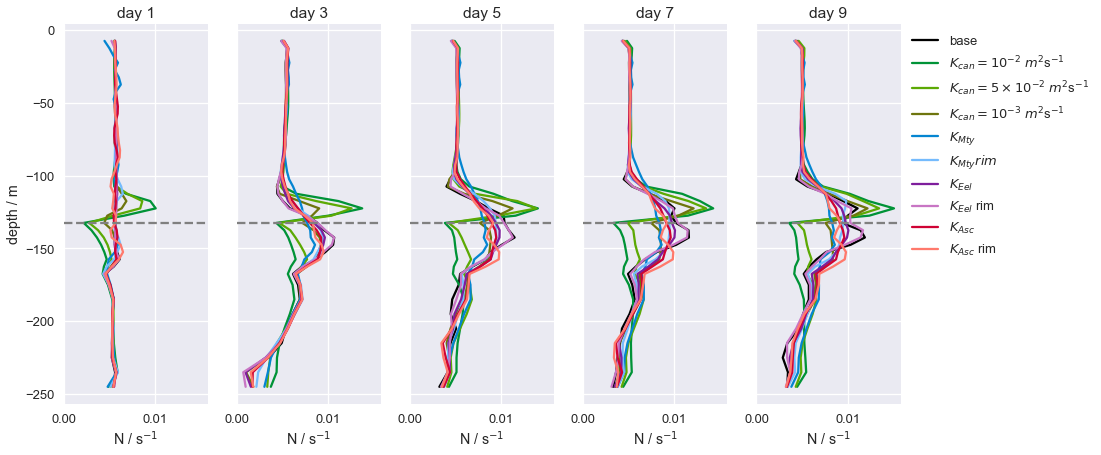

In [62]:
keys = ['N_tt02','N_tt06','N_tt10','N_tt14','N_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],rec.Z[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


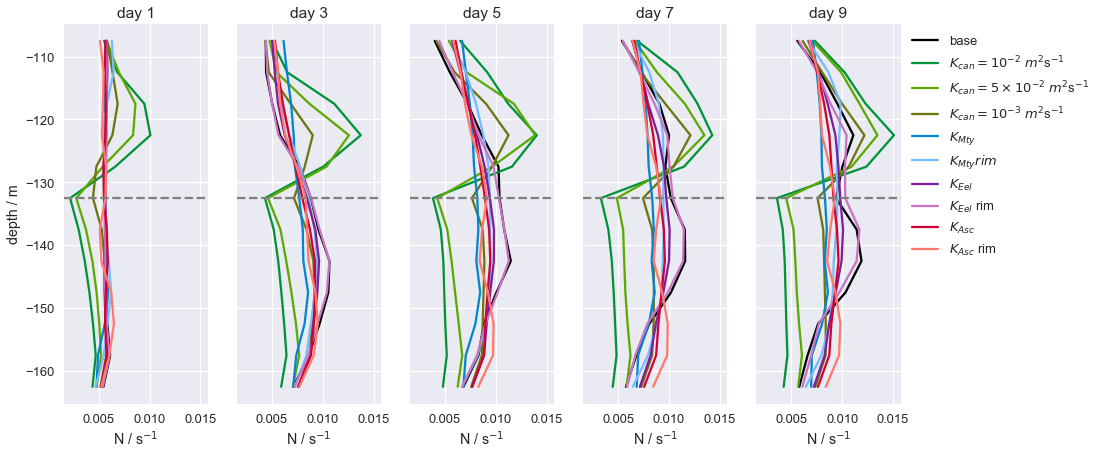

In [95]:
keys = ['N_tt02','N_tt06','N_tt10','N_tt14','N_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],rec.Z[21:33], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


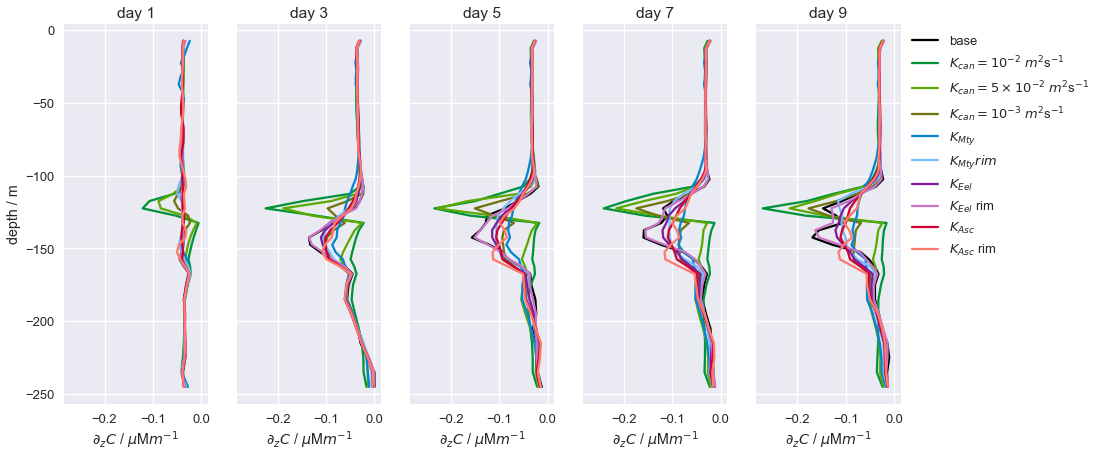

In [64]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],rec.Z[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



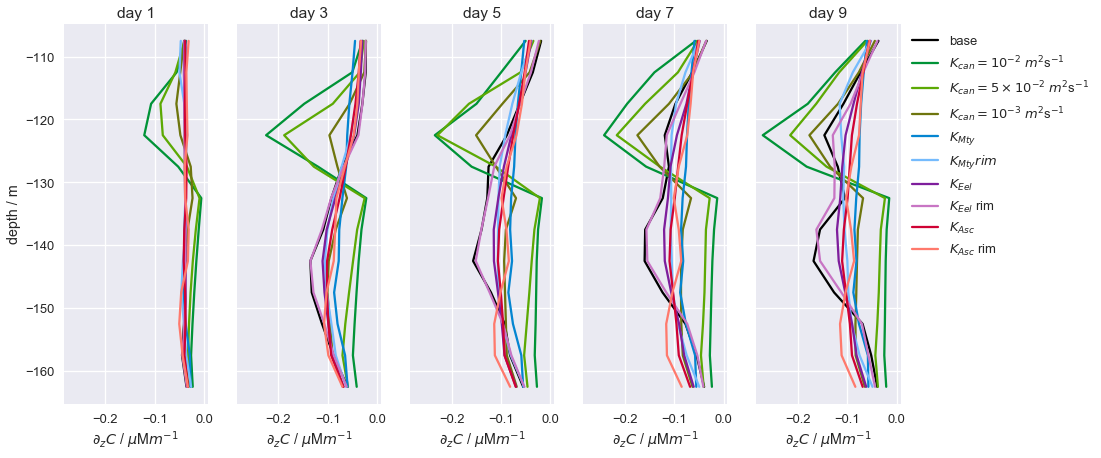

In [94]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],rec.Z[21:33], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



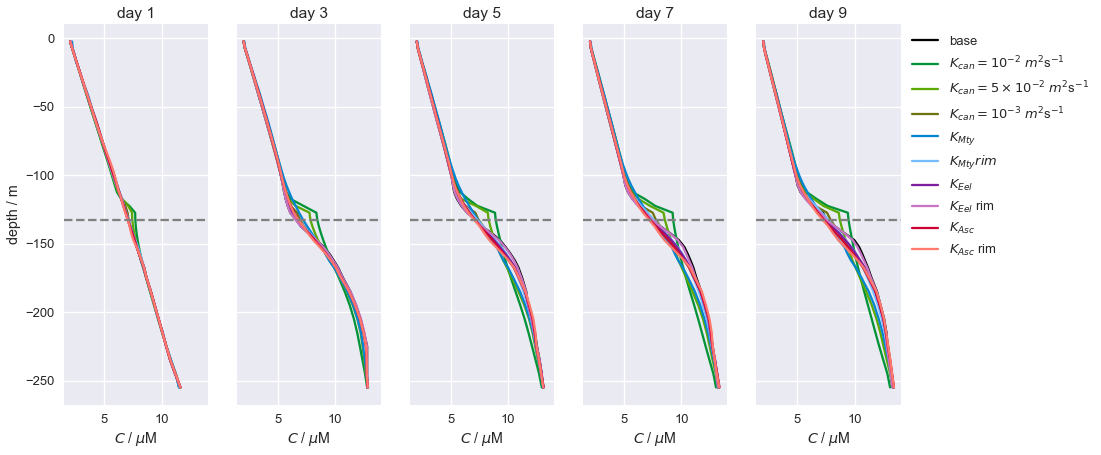

In [84]:
# Tracer profile
sns.set_style('darkgrid')

keys = ['Tr_profile_tt02','Tr_profile_tt06','Tr_profile_tt10','Tr_profile_tt14','Tr_profile_tt18']
days = ['1','3','5','7','9']

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],rec.Z[:], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$C$ / $\mu$M')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    

#plt.savefig('tracerprofile_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

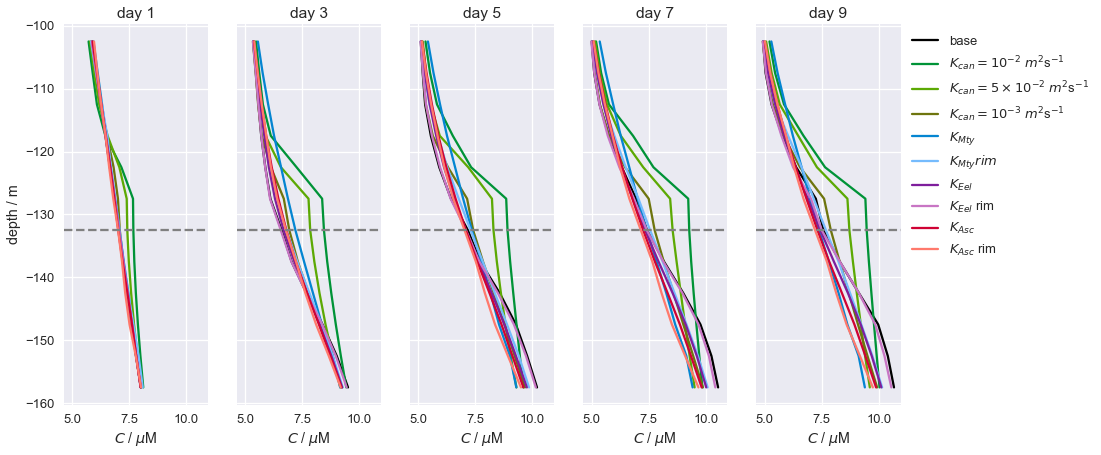

In [90]:
# Tracer profile
sns.set_style('darkgrid')

keys = ['Tr_profile_tt02','Tr_profile_tt06','Tr_profile_tt10','Tr_profile_tt14','Tr_profile_tt18']
days = ['1','3','5','7','9']

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],rec.Z[20:32], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$C$ / $\mu$M')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    

#plt.savefig('tracerprofile_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

CNTDIFF_run38 0.0 0.0
3DVISC_run06 8.12984800183 16.8664908686
3DVISC_run05 6.91917172334 14.6976760721
3DVISC_run03 -2.19160090733 0.809345365962
3DVISC_REALISTIC_run01 38.4215028356 35.3405552211
3DVISC_REALISTIC_run03 5.89578773725 8.82055678633
3DVISC_REALISTIC_run02 4.49953347068 4.53482671067
3DVISC_REALISTIC_run04 -9.20674836359 -9.07429550271
3DVISC_REALISTIC_run05 9.56614941268 10.4001549062
3DVISC_REALISTIC_run06 7.40176954072 9.18469468754


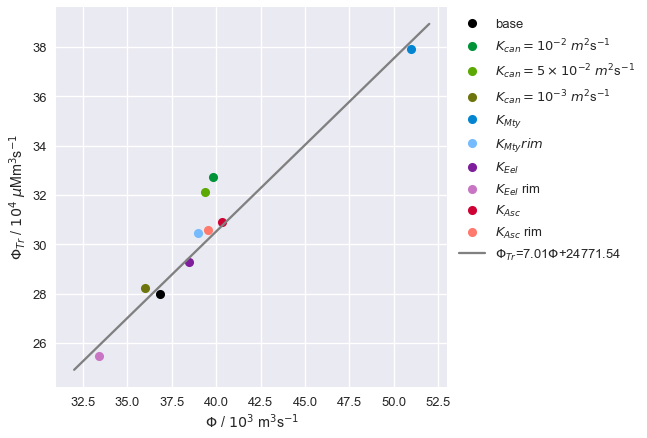

In [120]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

rec0 = records[0] # base case
for rec in records:
    #ax.errorbar(rec.Phi, rec.PhiTr, xerr=rec.Phi_std,yerr=rec.PhiTr_std, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax.plot(rec.Phi/1E3, rec.PhiTr/1E4,'o', color=sns.xkcd_rgb[rec.color], label=rec.label)
    rec.Phi_inc = 100*((rec.Phi-rec0.Phi)/rec0.Phi) 
    rec.PhiTr_inc = 100*((rec.PhiTr-rec0.PhiTr)/rec0.PhiTr) 
    print(rec.name,rec.Phi_inc,rec.PhiTr_inc)
ax.set_ylabel(r'$\Phi_{Tr}$ / $10^4$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$\Phi$ / $10^3$ m$^{3}$s$^{-1}$')


# Fit line using only realistic Kv cases
records_NoKv = [records[0],records[4],records[5],records[6],records[7],records[8],records[9]]
Phi_array = np.array([rec.Phi for rec in records_NoKv])
PhiTr_array = np.array([rec.PhiTr for rec in records_NoKv])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Phi_array,PhiTr_array)

ax.plot(np.linspace(32000,52000,100)/1E3,((slope*np.linspace(32000,52000,100))+intercept)/1E4, 
        color='0.5', label = r'$\Phi_{Tr}$=%1.2f$\Phi$+%1.2f' %(slope,intercept))

ax.legend(bbox_to_anchor=(1,1))    


* The Monterey bottom-normalized Kv profile increases the water flux by 38.42% and tracer flux by 35.34% with respect to the base case.
* Tracer flux is linearly proportional to water flux for realistic profiles; step Kv profiles seem to be outliers.
* This suggests that the increase in tracer flux is caused by the decrease in stratification due to realistic profiles that increases the water flux.
* Water flux is also larger in cases with a step kv profile (8.13% to 6.91%) but it is not the only thing causing an increase in tracer flux (the increase seems larger than expected from the realistic cases, 16.8% to 14.5%).The extra increase caused by an increase in concentration near the rim.
